# Dataset Lending ETL

In [26]:
# Import dependencies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set() 

In [3]:
# import datasets
# accepted applicants data file 
raw_accepted = pd.read_csv('../Archive/accepted_2007_to_2018Q4.csv') 
# rejected applicants data file
raw_rejected = pd.read_csv('../Archive/rejected_2007_to_2018Q4.csv')

In [4]:
#create data copy 
file_rejected = raw_rejected.copy()
file_rejected.head()

Amount Requested Application Date                        Loan Title  \
0            1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1            1000.0       2007-05-26                Consolidating Debt   
2           11000.0       2007-05-27       Want to consolidate my debt   
3            6000.0       2007-05-27                           waksman   
4            1500.0       2007-05-27                            mdrigo   

   Risk_Score Debt-To-Income Ratio Zip Code State Employment Length  \
0       693.0                  10%    481xx    NM           4 years   
1       703.0                  10%    010xx    MA          < 1 year   
2       715.0                  10%    212xx    MD            1 year   
3       698.0               38.64%    017xx    MA          < 1 year   
4       509.0                9.43%    209xx    MD          < 1 year   

   Policy Code  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [5]:
#create data copy 
file_accepted = raw_accepted.copy()
file_accepted.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

# Analysis 1 .Binary classification model to accept or reject loan application

In [6]:
''' 
Only keep those columns that are going to be used for analysis 
 
Application Date - date does not play a role in getting rejected or accepted unless you beleive in Numerology 
Loan Title - For out initial model we have left this out since it did not add a lot of value to the rejected decison. 
Zip Code - We saw people getting accepted and rejected for teh same zipcodes so we think that zipcode does not have a big impact on loan application
Policy Code- This is our target column so we have it but made sure it was all '0'

'''
file_rejected = file_rejected[['Amount Requested', 'Risk_Score',
       'Debt-To-Income Ratio', 'Employment Length']]

In [7]:
file_rejected['Label_target'] = 0
file_rejected.head()

Amount Requested  Risk_Score Debt-To-Income Ratio Employment Length  \
0            1000.0       693.0                  10%           4 years   
1            1000.0       703.0                  10%          < 1 year   
2           11000.0       715.0                  10%            1 year   
3            6000.0       698.0               38.64%          < 1 year   
4            1500.0       509.0                9.43%          < 1 year   

   Label_target  
0             0  
1             0  
2             0  
3             0  
4             0

In [8]:
# Extact the same columms from the  accepted applicant df to match the rejected data set. We will combine this dataset at a later set to make a complete data frame that will be used to train teh classification model. 

file_accepted = file_accepted[['loan_amnt', 'fico_range_low', 'fico_range_high', 'dti', 'emp_length']]
file_accepted.head()

loan_amnt  fico_range_low  fico_range_high    dti emp_length
0     3600.0           675.0            679.0   5.91  10+ years
1    24700.0           715.0            719.0  16.06  10+ years
2    20000.0           695.0            699.0  10.78  10+ years
3    35000.0           785.0            789.0  17.06  10+ years
4    10400.0           695.0            699.0  25.37    3 years

In [9]:
# Calculate the average FICO score for the high and low range of the applicant
file_accepted['average'] = (file_accepted['fico_range_low'] + file_accepted['fico_range_high'])*0.5

# Drop the FICO high and low scores 
file_accepted = file_accepted.drop(columns=['fico_range_low','fico_range_high'], axis=1)

In [10]:
#Create a target label column for accepted df
file_accepted['label_target']=1   
file_accepted.head()

loan_amnt    dti emp_length  average  label_target
0     3600.0   5.91  10+ years    677.0             1
1    24700.0  16.06  10+ years    717.0             1
2    20000.0  10.78  10+ years    697.0             1
3    35000.0  17.06  10+ years    787.0             1
4    10400.0  25.37    3 years    697.0             1

In [11]:
# rename columns for accepted and rejected df
file_accepted.rename(columns= {'loan_amnt': 'Loan_Amount', 'dti': 'Debt_income_ratio', 'average': 'Credit_Score', 'label_target': 'Loan_Status', 'emp_length':'Emp_Length'}, inplace=True)

file_rejected.rename(columns= {'Amount Requested': 'Loan_Amount', 'Debt-To-Income Ratio': 'Debt_income_ratio', 'Risk_Score': 'Credit_Score', 'Label_target': 'Loan_Status', 'Employment Length':'Emp_Length'}, inplace=True)

In [12]:
# rearrange columns in rejected df to concat with the accepted df
file_rejected = file_rejected[['Loan_Amount', 'Debt_income_ratio', 'Emp_Length', 'Credit_Score', 'Loan_Status']]
file_rejected.head()

Loan_Amount Debt_income_ratio Emp_Length  Credit_Score  Loan_Status
0       1000.0               10%    4 years         693.0            0
1       1000.0               10%   < 1 year         703.0            0
2      11000.0               10%     1 year         715.0            0
3       6000.0            38.64%   < 1 year         698.0            0
4       1500.0             9.43%   < 1 year         509.0            0

In [17]:
# remove % from Debt_income_ratio
file_rejected['Debt_income_ratio'] = file_rejected['Debt_income_ratio'].str.replace('%','')
file_rejected['Debt_income_ratio'] = pd.to_numeric(file_rejected['Debt_income_ratio'])
file_rejected.head()


Loan_Amount  Debt_income_ratio Emp_Length  Credit_Score  Loan_Status
0       1000.0              10.00    4 years         693.0            0
1       1000.0              10.00   < 1 year         703.0            0
2      11000.0              10.00     1 year         715.0            0
3       6000.0              38.64   < 1 year         698.0            0
4       1500.0               9.43   < 1 year         509.0            0

In [18]:
# Check number of NaNs in rejected dataset

file_rejected.isnull().sum()

Loan_Amount                 0
Debt_income_ratio           0
Emp_Length             951355
Credit_Score         18497630
Loan_Status                 0
dtype: int64

In [19]:
# Check number of NaNs in accepted dataset

file_accepted.isnull().sum()

Loan_Amount              33
Debt_income_ratio      1744
Emp_Length           146940
Credit_Score             33
Loan_Status               0
dtype: int64

In [20]:
# Drop NaNs from both datasets

file_accepted = file_accepted.dropna()
file_rejected = file_rejected.dropna()
print(f'There are {file_accepted.shape[0]} succesfull applications and {file_rejected.shape[0]} unsuccessful applications')

There are 2113648 succesfull applications and 8992595 unsuccessful applications


In [22]:
# Save cleaned data sets 
file_accepted.to_csv('../Archive/accepted_data_clean', index=False)
file_rejected.to_csv('../Archive/rejected_data_clean', index=False)

In [23]:
# Concatinate the two dataframes to single 
consolidated = pd.concat([file_accepted, file_rejected], axis=0).reset_index(drop=True)

In [24]:
# Check unique values in Emp_length col
consolidated['Emp_Length'].value_counts()

< 1 year     8358386
10+ years     960253
5 years       365812
2 years       282099
3 years       248095
1 year        224209
4 years       186245
6 years       137652
7 years       122446
8 years       119819
9 years       101227
Name: Emp_Length, dtype: int64

In [25]:
# Remove the strings years, <,>,+ from Emp_length

consolidated['Emp_Length'] = consolidated['Emp_Length'].replace('10+ years','10')
consolidated['Emp_Length'] = consolidated['Emp_Length'].replace('< 1 year','0')
consolidated['Emp_Length'] = consolidated['Emp_Length'].replace('1 year','1')
consolidated['Emp_Length'] = consolidated['Emp_Length'].str.replace(' years','')
consolidated['Emp_Length'] = consolidated['Emp_Length'].replace(' ','')
consolidated['Emp_Length'] = pd.to_numeric(consolidated['Emp_Length'])
consolidated['Emp_Length'].value_counts()

0     8358386
10     960253
5      365812
2      282099
3      248095
1      224209
4      186245
6      137652
7      122446
8      119819
9      101227
Name: Emp_Length, dtype: int64

### Data Visualization

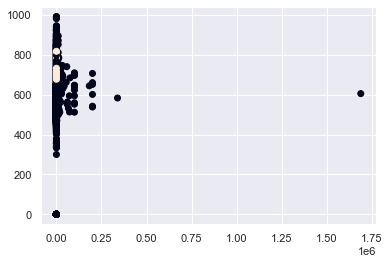

In [33]:
sample_df = consolidated.sample(frac=0.005, replace=False, random_state=1)

plt.scatter(sample_df['Debt_income_ratio'],sample_df['Credit_Score'],c=sample_df['Loan_Status'])
plt.show()

<AxesSubplot:ylabel='Density'>

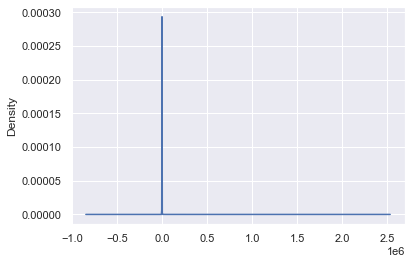

In [34]:
sample_df['Debt_income_ratio'].plot.density()

<AxesSubplot:ylabel='Density'>

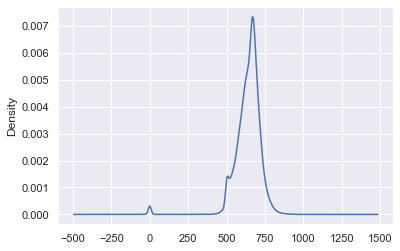

In [36]:
sample_df['Credit_Score'].plot.density()

# Machine Learning Logistic Regression Modeling

In [ ]:
# Import Machiine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = consolidated['Loan_Status']
X = consolidated.drop('Loan_Status',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

scaler = StandardScaler()

scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression(solver='lbfgs',max_iter=100)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))